## Probability Function for single and multiple eigenstate cases :
The probability of measuring a certain $|y\rangle$ is given by <br>
<br>
$$\therefore \operatorname{Pr}(y) = \frac{1}{M^2}\left(\frac{1-\cos{\left(\frac{2 \pi M}{M}\left(y- \frac{\theta M}{2\pi}\right)\right)}}{1-\cos{\left(\frac{2 \pi }{M}\left(y- \frac{\theta M}{2\pi}\right)\right)}}\right) \hspace{0.5cm} where, \hspace{0.2cm} M = 2^t
$$
<br>
Now for general case where $|\psi_k\rangle = \sum_{k}a_k|\psi_k\rangle$ is a superposition of a number of states the probability of measuring a certain $|y\rangle$ is given by <br>
<br>
$$
Pr(y_0) = \frac{1}{M^2}\sum_{k}a_k^2 \left(\frac{1-\cos{\left(\frac{2 \pi M}{M}\left(y_0- \frac{\theta_k M}{2\pi}\right)\right)}}{1-\cos{\left(\frac{2 \pi }{M}\left(y_0- \frac{\theta_k M}{2\pi}\right)\right)}}\right) \hspace{0.5cm} where, \hspace{0.2cm} M = 2^t
$$ 
<br>

In [1]:
# t = estimation register size ; y = 0 to 2^t-1 ; 0 < Theta < 2*pi
import matplotlib.pyplot as plt

def P(t, theta, y):       # P(y,theta) for basic case (one eigenstate)
    import numpy as np
    M=2**t
    numerator = 1 - np.cos((2*np.pi)*(y - theta*M/(2*np.pi)))
    denominator = 1 - np.cos((2*np.pi/M)*(y - theta*M/(2*np.pi)))
    return numerator/(denominator*M**2)


def Pr(t, y, a_k, theta):         # P(y,theta) for general case (multiple eigenstate) returns total sum +  
    list=[]                       # contribution from each terms
    import numpy as np
    M=2**t
    
    for k in range(len(a_k)):
        numerator = 1 - np.cos((2*np.pi)*(y - theta[k]*M/(2*np.pi)))
        denominator = 1 - np.cos((2*np.pi/M)*(y - theta[k]*M/(2*np.pi)))
        term = (a_k[k]**2)*(numerator/denominator)
        list.append(term/M**2)
            
    return sum(list), list 


<ipython-input-1-b1486d183e0f>:9: RuntimeWarning: invalid value encountered in double_scalars
  return numerator/(denominator*M**2)


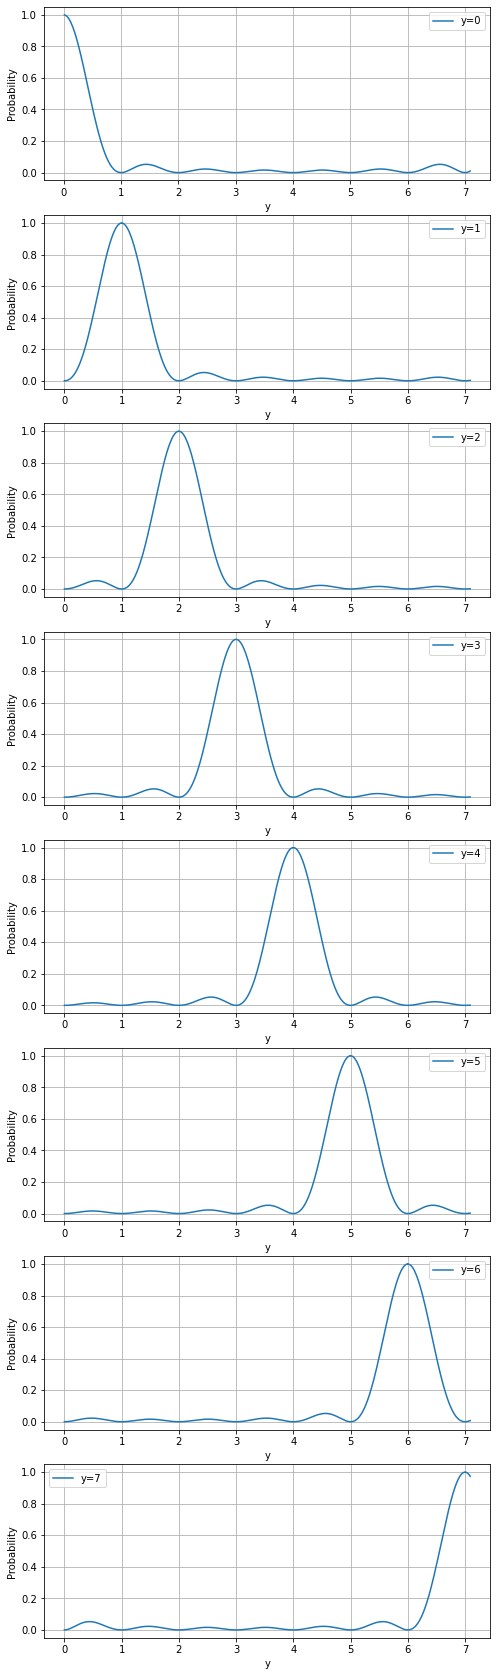

In [26]:
#plotting for basic case (single eigenstate)

import numpy as np
t=3
theta = np.arange(0, 2*np.pi, np.pi/4)
y=np.arange(0,7.1,0.01) 
AX = ['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']

f = plt.figure(figsize=(8,30))
for j in range(len(theta)):
    x=[]
    for i in range(len(y)):
        x.append(P(t, theta[j], y[i]))
    AX[j] =  f.add_subplot(8,1,j+1)
    
    plt.grid()
    plt.xlabel("y")
    plt.ylabel("Probability") 
    
    AX[j].plot(y, x,)
    plt.legend(['y={0}'.format(j)])
    




In [27]:
print(P(3, 1.5, 2)) #for basic case

0.9739596198382319


In [28]:
# Using the expression of general case (Checking if it matches with above if there is only one eigen state)

t=3
y=2
a_k =[1] 
theta = [1.5]
print(Pr(t, y, a_k, theta))

(0.9739596198382319, [0.9739596198382319])


<ipython-input-1-b1486d183e0f>:20: RuntimeWarning: invalid value encountered in double_scalars
  term = (a_k[k]**2)*(numerator/denominator)


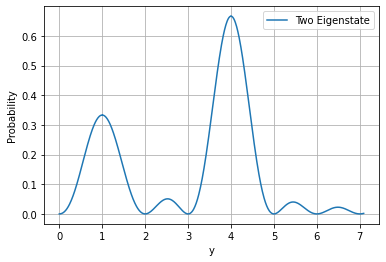

In [29]:
import numpy as np
t=3
a_k = [1/np.sqrt(3), np.sqrt(2/3)]
x=np.arange(0,7.1,0.01)

#create two empty lists to contain values of each term in the sum

y=[]

for j in range(len(x)):
    y.append(Pr(t, x[j], a_k, [np.pi/4 , np.pi])[0])
    
plt.plot(x,y, label="Two Eigenstate")
    
plt.grid()
plt.xlabel("y")
plt.ylabel("Probability")
plt.legend()
plt.show()

## Density Matrix :
The density matrix is defined as $\rho = \sum_{i}p_i|\psi_i\rangle\langle\psi_i|$  where $\psi_i$'s are the quantum states with different probability amplitude $p_i$. However in our case there is only one state $|\phi_3\rangle$, so the density matrix is given by $\rho = |\phi_3\rangle\langle\phi_3|$. <br>  

$$\therefore \rho = |\phi_3\rangle\langle\phi_3|$$
<br> 
$$
\left( \frac{1}{M} \sum_{j=0}^{M-1} \left(\sum_{x=0}^{M-1} e^{-2 \pi i\frac{jx}{M}}|x\rangle \right)\otimes\sum_{k}a_ke^{2\pi ij\frac{\theta_k}{2\pi}}|\psi_k\rangle\right)\left(\frac{1}{M} \sum_{j^{\prime}=0}^{M-1} \left(\sum_{y=0}^{M-1} e^{2 \pi i\frac{j^{\prime}y}{M}}\langle y| \right)\otimes\sum_{k^{\prime}}a_{k^{\prime}}e^{-2\pi ij^{\prime}\frac{\theta_{k^{\prime}}}{2\pi}}\langle\psi_{k^{\prime}}| \right)
$$
<br> 

$$
=\frac{1}{M^2} \sum_{k}\sum_{k^{\prime}}a_ka_{k^{\prime}}\sum_{x=0}^{M-1}\sum_{j=0}^{M-1} e^{-2 \pi ij \left(\frac{x}{M}-\frac{\theta_k}{2\pi} \right)}\sum_{y=0}^{M-1}\sum_{j^{\prime}=0}^{M-1} e^{2 \pi ij^{\prime} \left(\frac{y}{M}-\frac{\theta_{k^{\prime}}}{2\pi}\right)}|x\rangle\langle y|\otimes|\psi_k\rangle \langle\psi_{k^{\prime}}|
$$
<br> 

$$
=\frac{1}{M^2} \sum_{k}\sum_{k^{\prime}}a_ka_{k^{\prime}}\left[\sum_{x=0}^{M-1}\frac{e^{-2 \pi i \left(\frac{x}{M}-\frac{\theta_k}{2\pi} \right)M}-1}{e^{-2 \pi i \left(\frac{x}{M}-\frac{\theta_k}{2\pi} \right)}-1}\right]\left[\sum_{y=0}^{M-1}\frac{e^{2 \pi i \left(\frac{y}{M}-\frac{\theta_{k^{\prime}}}{2\pi}\right)M}-1}{e^{2 \pi i \left(\frac{y}{M}-\frac{\theta_{k^{\prime}}}{2\pi}\right)}-1}\right]|x\rangle\langle y|\otimes|\psi_k\rangle \langle\psi_{k^{\prime}}|
$$
<br> 

### Incomplete density matrix function
Here is version of incomplete density matrix function :
$$
\rho = \sum_{y=0}^{M-1}\frac{1}{M^2}\sum_{k}a_k^2 \left(\frac{1-\cos{\left(\frac{2 \pi M}{M}\left(y_0- \frac{\theta_k M}{2\pi}\right)\right)}}{1-\cos{\left(\frac{2 \pi }{M}\left(y_0- \frac{\theta_k M}{2\pi}\right)\right)}}\right)|y\rangle\langle y| \hspace{0.5cm} where, \hspace{0.2cm} M = 2^t
$$ 
<br>
### Steps for writing the function
<br>
<list>
<li>Change $|y\rangle$ and $\langle y|$ to computational basis form depending on the number of t qubits. For example $\langle5|$ for t=3 qubits should be $\langle 101| = $ [0,0,0,0,1,0,0,0]
<li> Write codes that transforms y to binary list form. Add extra zero to the biginning of list if list size is less than t.
<li> Write some codes that are able to perform proper tensor product. For example $\langle 101| =(0,1)\otimes(1,0)\otimes(0,1) =  [0,0,0,0,1,0,0,0]$. 
<li> Do the same for ket part (Do same as before but at last make a transpose of the matrix)
<li> Calculate the outer product $|y\rangle\langle y|$ multiplied by probability function.
<li> Calculate $\sum_{y}P(y)|y\rangle \langle y|$  
<list>

In [30]:
def RHO(t, a_k, theta):
    M=2**t
    # Define a rho which gives back a matrix for a particular x,y () Basically gives back P(y)|y><y|
    
    def rho(x, y, t, a_k, theta):
        
        def Pr(t, y, a_k, theta):         # P(y,theta) for general case (multiple eigenstate) returns total sum +  
            List=[]                       # contribution from each terms
            import numpy as np
               
            for k in range(len(a_k)):
                numerator = 1 - np.cos((2*np.pi)*(y - theta[k]*M/(2*np.pi)))
                denominator = 1 - np.cos((2*np.pi/M)*(y - theta[k]*M/(2*np.pi)))
                term = (a_k[k]**2)*(numerator/denominator)
                List.append(term/M**2)
            
            return sum(List)
    
        def Multiply(A,B):              # A,B are array gives tensor product
            X=list(A[0]*B)              # multiply 0th term of A with all term of B and store it in X
            for i in range(1,len(A)):   
                X = X + list(A[i]*B)    # Loop concatenates/inserts next terms like 1st term of A multiplied by B in same X
            return X
    
        def columnmatrix(x,t):        # Creates |x> ket column term, here x is integer, we create computational basis 
            import numpy as np        # corresponding to that x depending on total size of t estimation register 
            x1=[]                     # example x=2, t=3 gives columnmatrix(x,t) =[0,0,0,0,0,0,1,0]
            Zero = np.array([1,0])    # qubit 0 state
            One = np.array([0,1])     # qubit 1 state
            if x==0:
                x1.append(x)
            while x != 0:
                x1.append(x%2)
                x = x//2 
            while len(x1)!= t:
                x1.append(0)
            
            x1.reverse()              # x1 is list containig binary form of x 
            x2 = np.array(x1)         # Now if we can do tensor product using matrices for 0 and 1 we get basis form of x
            if x2[0] == 0:            # If 0th term is 0 then begin tensor product using Multiply function   
                A = Zero
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
        
            elif x2[0] == 1:          # If 0th term is 1 then begin tensor product using Multiply function
                A = One
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
            return np.matrix(A).T     # make transpose of whole matrix (1D array) found using tensor product 
        
        def rowmatrix(y,t):           # Creates <y| bra row term, here y is integer, we create computational basis 
            import numpy as np        # same procepure as above but don't do transpose at last, this will keep row form
            x1=[]
            Zero = np.array([1,0])
            One = np.array([0,1])
            if y==0:
                x1.append(y)
            while y != 0:
                x1.append(y%2)
                y = y//2 
            while len(x1)!= t:
                x1.append(0)
            
            x1.reverse()
            x2 = np.array(x1)
            if x2[0] == 0:
                A = Zero
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
        
            elif x2[0] == 1:
                A = One
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
            return np.matrix(A)         # the whole matrix (1D array) found using tensor product 
        
        return columnmatrix(x,t)*rowmatrix(y,t)*round(Pr(t, y, a_k, theta),3) # this is P(y)|x><y| does work for only P(y)|y><y|
    
    Matrix = rho(0, 0, t, a_k, theta)   # this is P(0)|0><0|
    for j in range(1, M):
        Matrix += rho(j, j, t, a_k, theta)
    return Matrix                       # this is Sum(P(y)|y><y|)
    

In [31]:
t=3
import numpy as np
a_k =[1/np.sqrt(3), np.sqrt(2)/np.sqrt(3)]
theta = [round(np.pi/4,3), round(np.pi,3)]

In [32]:
print(RHO(t, a_k, theta))

[[0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.333 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.667 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.   ]]


### Complete density matrix function
Here is the trial version of complete density matrix function :
<br> 

$$
\rho =\frac{1}{M^2} \sum_{k}\sum_{k^{\prime}}a_ka_{k^{\prime}}\left[\sum_{x=0}^{M-1}\frac{e^{-2 \pi i \left(\frac{x}{M}-\frac{\theta_k}{2\pi} \right)M}-1}{e^{-2 \pi i \left(\frac{x}{M}-\frac{\theta_k}{2\pi} \right)}-1}\right]\left[\sum_{y=0}^{M-1}\frac{e^{2 \pi i \left(\frac{y}{M}-\frac{\theta_{k^{\prime}}}{2\pi}\right)M}-1}{e^{2 \pi i \left(\frac{y}{M}-\frac{\theta_{k^{\prime}}}{2\pi}\right)}-1}\right]|x\rangle\langle y|
$$
<br> 

In [33]:
def RHO_C(t, a_k, theta):
    M=2**t
    # Define a rho which gives back a matrix for a particular x,y () Basically gives back P(y)|y><y|
    
    def rho(x, y, t, a_k, theta):
        
        def Pr(t, y, a_k, theta):         # P(y,theta) for general case (multiple eigenstate) returns total sum +  
            List=[]                       # contribution from each terms
            import numpy as np
               
            for k in range(len(a_k)):
                numerator = 1 - np.cos((2*np.pi)*(y - theta[k]*M/(2*np.pi)))
                denominator = 1 - np.cos((2*np.pi/M)*(y - theta[k]*M/(2*np.pi)))
                term = (a_k[k]**2)*(numerator/denominator)
                List.append(term/M**2)
            return sum(List)
        
        def Gr(t, x, y, a_k, theta):         # P(y,theta) for general case (multiple eigenstate) returns total sum +  
            List=[]                       # contribution from each terms
            import numpy as np
            import cmath   
            z = 0+1j
            for k in range(len(a_k)):
                a = a_k[k]
                term1 = (np.exp(-2*np.pi*z*(x - theta[k]*M/(2*np.pi)))-1)/((np.exp(-2*np.pi*z*(x - theta[k]*M/(2*np.pi)/M))-1))
                for k_prime in range(len(a_k)):
                    term2 = a*a_k[k_prime]*term1*(np.exp(2*np.pi*z*(y - theta[k_prime]*M/(2*np.pi)))-1)/((np.exp(2*np.pi*z*(y - theta[k_prime]*M/(2*np.pi))/M))-1)
                
                    List.append(term2/M**2)
            num = sum(List)
            Output = round(num.real, 2) + round(num.imag, 2) * 1j
            return Output
    
        def Multiply(A,B):              # A,B are array gives tensor product
            X=list(A[0]*B)              # multiply 0th term of A with all term of B and store it in X
            for i in range(1,len(A)):   
                X = X + list(A[i]*B)    # Loop concatenates/inserts next terms like 1st term of A multiplied by B in same X
            return X
    
        def columnmatrix(x,t):        # Creates |x> ket column term, here x is integer, we create computational basis 
            import numpy as np        # corresponding to that x depending on total size of t estimation register 
            x1=[]                     # example x=2, t=3 gives columnmatrix(x,t) =[0,0,0,0,0,0,1,0]
            Zero = np.array([1,0])    # qubit 0 state
            One = np.array([0,1])     # qubit 1 state
            if x==0:
                x1.append(x)
            while x != 0:
                x1.append(x%2)
                x = x//2 
            while len(x1)!= t:
                x1.append(0)
            
            x1.reverse()              # x1 is list containig binary form of x 
            x2 = np.array(x1)         # Now if we can do tensor product using matrices for 0 and 1 we get basis form of x
            if x2[0] == 0:            # If 0th term is 0 then begin tensor product using Multiply function   
                A = Zero
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
        
            elif x2[0] == 1:          # If 0th term is 1 then begin tensor product using Multiply function
                A = One
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
            return np.matrix(A).T     # make transpose of whole matrix (1D array) found using tensor product 
        
        def rowmatrix(y,t):           # Creates <y| bra row term, here y is integer, we create computational basis 
            import numpy as np        # same procepure as above but don't do transpose at last, this will keep row form
            x1=[]
            Zero = np.array([1,0])
            One = np.array([0,1])
            if y==0:
                x1.append(y)
            while y != 0:
                x1.append(y%2)
                y = y//2 
            while len(x1)!= t:
                x1.append(0)
            
            x1.reverse()
            x2 = np.array(x1)
            if x2[0] == 0:
                A = Zero
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
        
            elif x2[0] == 1:
                A = One
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
            return np.matrix(A)         # the whole matrix (1D array) found using tensor product 
        if x==y:
            return columnmatrix(x,t)*rowmatrix(y,t)*complex(round(Pr(t, y, a_k, theta),2),0) # this is P(y)|x><y| does work for only P(y)|y><y|
        else:
             return columnmatrix(x,t)*rowmatrix(y,t)*Gr(t, x, y, a_k, theta)
            
    Matrix = np.matrix(np.zeros([M,M], dtype=complex))   # Initiate zero matrix
    for j in range(0, M):
        for l in range(0, M):
            Matrix += rho(l, j, t, a_k, theta)
    
    return Matrix                       # this is Sum(P(x,y)|x><y|)
    

In [36]:
RHO_C(t, a_k, theta)


matrix([[0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
         0.  +0.j, 0.  +0.j],
        [0.  +0.j, 0.33+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
         0.  +0.j, 0.  +0.j],
        [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
         0.  +0.j, 0.  +0.j],
        [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
         0.  +0.j, 0.  +0.j],
        [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.67+0.j, 0.  +0.j,
         0.  +0.j, 0.  +0.j],
        [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
         0.  +0.j, 0.  +0.j],
        [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
         0.  +0.j, 0.  +0.j],
        [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
         0.  +0.j, 0.  +0.j]])

In [37]:
from qiskit import QuantumCircuit, Aer, execute, transpile
import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from math import gcd

from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.quantum_info.operators import Operator, Pauli

In [86]:
"""-------------Quantum Fourier Transform---------------"""

def qft(phase_register_size):
    """Creates an n-qubit QFT circuit"""
    n = phase_register_size
    circuit = QuantumCircuit(n)
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)
    
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

"""-------------Inverse Quantum Fourier Transform---------------"""

def qft_dagger(circuit, phase_register_size):
    """n-qubit QFTdagger the first n qubits in circ"""
    n = phase_register_size
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circuit.cp(-np.pi/float(2**(j-m)), m, j)
        circuit.h(j)
    return circuit

"""-------------Quantum Phase Estimation--------------"""

def qpe_circuit(register_size, angle):
    # Your code goes here
    
    phase_register_size = register_size
    qpe = QuantumCircuit(phase_register_size+1, phase_register_size)

    # Apply H-Gates to counting qubits:
    for qubit in range(phase_register_size):
        qpe.h(qubit)

    # Prepare our eigenstate |psi>:
    qpe.x(phase_register_size)

    # Do the controlled-U operations:
    angle = 2*np.pi*angle
    repetitions = 1
    for counting_qubit in range(phase_register_size):
        for i in range(repetitions):
            qpe.cp(angle, counting_qubit, phase_register_size);
        repetitions *= 2

    qpe.barrier()

    qft_dagger(qpe, phase_register_size)

    for n in range(phase_register_size):
        qpe.measure(n,n)
        
    return qpe

In [94]:
def measure_output(qc, num_qubits):
    
    """If you do not want to measure all qubits you can define your own
    """
    from qiskit import QuantumCircuit, Aer, transpile, assemble
    from qiskit.providers.aer import QasmSimulator
    from qiskit.visualization import plot_histogram

    simulator = Aer.get_backend('aer_simulator')
    #compiled_circuit = transpile(qc, simulator)
    job = execute(qc, simulator, shots=1000)
    result = job.result()
    counts = result.get_counts(qc)
    return counts


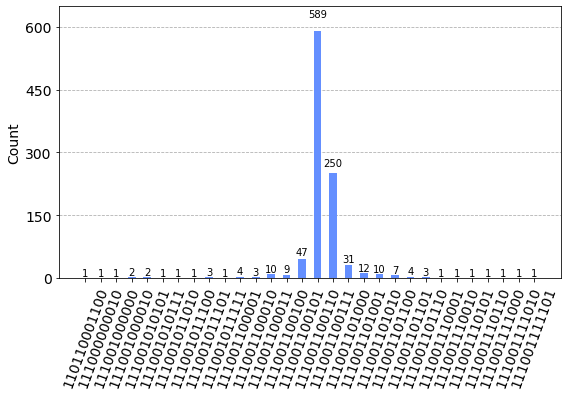

In [95]:
reg_size = 12
qpe_check = qpe_circuit(reg_size, 0.9)
counts = measure_output(qpe_check, reg_size)
plot_histogram(counts, figsize=(9,5))


In [98]:
def convert_measure_output(counts):
    
    """Converts the bitstring that has been counted highest (among all possible values) to decimal value.
    Change the last loop if you want something different.
    Here it returns 0 <= value <= 1
    """
    def binary_to_decimal(y):
        x=0
        for i in range(len(y)):
            x=x+int(y[i])/2**(i+1)
        return x
    
    max_binary_counts = 0
    max_binary_val = ''
    for key, item in counts.items():
        if item > max_binary_counts:
            max_binary_counts = item
            max_binary_val = key
            
    max_val = max_binary_val        
    return binary_to_decimal(max_val)
   
    

In [97]:
convert_measure_output(counts)

0.89990234375

In [105]:
test_y = np.arange(0,7, 0.2)
angle = [test_y[i]/8 for i in range(len(test_y))]
Y_plot=[]
for i in range(len(test_y)):
    reg_size = 12
    qpe_check = qpe_circuit(reg_size, angle[i])
    count_value = measure_output(qpe_check, reg_size)
    count_value = convert_measure_output(count_value)
    print("Against original angle value of {angle}, output of QPE Circuit is {value}".format(angle = round(angle[i],5),value = round(count_value,5)))
    print()

Against original angle value of 0.0, output of QPE Circuit is 0.0

Against original angle value of 0.025, output of QPE Circuit is 0.0249

Against original angle value of 0.05, output of QPE Circuit is 0.05005

Against original angle value of 0.075, output of QPE Circuit is 0.07495

Against original angle value of 0.1, output of QPE Circuit is 0.1001

Against original angle value of 0.125, output of QPE Circuit is 0.125

Against original angle value of 0.15, output of QPE Circuit is 0.1499

Against original angle value of 0.175, output of QPE Circuit is 0.17505

Against original angle value of 0.2, output of QPE Circuit is 0.19995

Against original angle value of 0.225, output of QPE Circuit is 0.2251

Against original angle value of 0.25, output of QPE Circuit is 0.25

Against original angle value of 0.275, output of QPE Circuit is 0.2749

Against original angle value of 0.3, output of QPE Circuit is 0.30005

Against original angle value of 0.325, output of QPE Circuit is 0.32495

Aga